In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_original = np.array([[2,1],[1,2],[2,4],[3,2],[6,4],[5,3],[5,5],[3,4],[2,6],[4,1]])
y = np.array([[-1,1,1,-1,-1,-1,1,1,1,-1]])
x = x_original.T

In [3]:
 w=np.array([[1],[-0.001]])

In [4]:
def plot(x,y,w,curr_x1,curr_x2,correct):
    max_coordinates = np.amax(x_original,axis=0)
    plt.xlim= ((-max_coordinates[0]//2,max_coordinates[0]+2))
    plt.ylim((-max_coordinates[1]//2,max_coordinates[1]+2))
    
    for count,val in enumerate(x_original):
        if y[0][count]==-1:
            plt.scatter(val[0],val[1],color='red')
        else:
            plt.scatter(val[0],val[1],color='blue')
    if(correct == True):       
        plt.scatter(curr_x1,curr_x2,s = 100, color = 'green')
    else:
        plt.scatter(curr_x1,curr_x2,s = 100, color = 'white',marker = 'x')     
            
        
    m = -w[0]/w[1]
    #max_coordinates = np.amax(x_original,axis=0)
    x_line= [[0.,0.],max_coordinates]
    print(x_line)
    y_line = m*x_line
    plt.plot(x_line,y_line)
    plt.show()

# Calculate Cost Funtion
___

Our objective is to minimize the cost funtion

$$ J(w) = \frac{1}{2}||w^{2}|| +
\frac{C}{N} \sum_{i = 1}^m (max (1- y^{(i)} (w x^{(i)}+ b), 0))$$


In [5]:
def cost_function(x,y,w,C):
    N = y.shape[1]
    regularization_loss = 0.5*np.linalg.norm(w)
    hinge_loss = (C/N) * np.sum(np.maximum(1- y*np.dot(w.T,x),0))
    cost = regularization_loss + hinge_loss
    return cost

In [6]:
np.maximum(1-y*np.dot(w.T,x),0)

array([[2.999e+00, 2.000e-03, 0.000e+00, 3.998e+00, 6.996e+00, 5.997e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.999e+00]])

In [7]:
np.sum(np.maximum(1-y*np.dot(w.T,x),0))/y.shape[1]

2.4991

In [8]:
cost_function(x,y,w,1000)

2499.60000025

# Calculate the grads
___

[[0.0, 0.0], array([6, 6])]


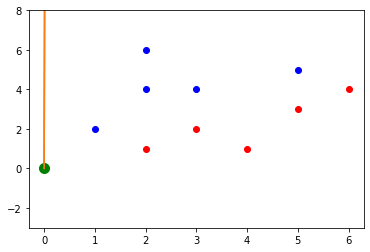

In [9]:
plot(x_original,y,w,0,0,True)

In [15]:
def grads(x,y,w,C):
    N = y.shape[1]
    dw = np.zeros_like(w)
    
    distances = 1- (y*np.dot(w.T,x))
    
    for index, d in enumerate(distances[0]):
        
        if(max(d,0) == 0):
            dwi= w
            
        else:
            xi= [[x[0][index]], [x[1][index]]]
            yi = y[0][index]
            
            dwi= w - (C * np.multiply(yi , xi))
        dw = dw+dwi
                      
    assert(dw.shape == w.shape)
    return dw/N

In [16]:
steps = 10000
lr = 0.001
c = 1000
N = y.shape[1]
print('Initial cost', cost_function(x,y,w,c))
for step in range(steps):
    w = w- lr/N*grads(x,y,w,c)
    if(step %100 == 0):
        print('Cost after',step,'iteration',cost_function(x,y,w,c))

Initial cost 2499.60000025
Cost after 0 iteration 2057.3175881569896
Cost after 100 iteration 22.361470355353003
Cost after 200 iteration 1.0771066764849466
Cost after 300 iteration 1.0734220197152542
Cost after 400 iteration 1.0697735328004252
Cost after 500 iteration 13.477521010671495
Cost after 600 iteration 1.1509561119276988
Cost after 700 iteration 1.1465331042017757
Cost after 800 iteration 1.1421536520883488
Cost after 900 iteration 1.1378180230513975
Cost after 1000 iteration 1.1335250759378404
Cost after 1100 iteration 1.1292750868865553
Cost after 1200 iteration 1.1250669233772836
Cost after 1300 iteration 1.1209008700520375
Cost after 1400 iteration 1.1167758028550017
Cost after 1500 iteration 1.1126920147629182
Cost after 1600 iteration 1.108648390019354
Cost after 1700 iteration 1.104645229770663
Cost after 1800 iteration 1.1006814263979836
Cost after 1900 iteration 1.0967572890553907
Cost after 2000 iteration 1.0928717181029688
Cost after 2100 iteration 1.08902503054377

In [17]:
w

array([[-1.47356942],
       [ 1.70869563]])

[[0.0, 0.0], array([6, 6])]


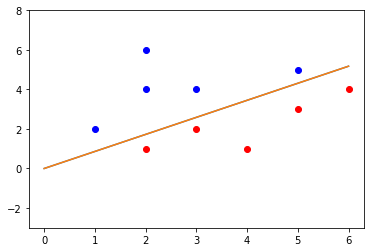

In [18]:
plot(x,y,w,1,1,correct = None)